In [1]:
# Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Get list of study data duplicates
study_data_duplicates = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])==True]
study_data_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = [mouse for mouse in study_data_duplicates["Mouse ID"]]
duplicate_mice

['g989', 'g989', 'g989', 'g989', 'g989']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = study_data_complete[study_data_complete["Mouse ID"]=="g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete.loc[(study_data_complete["Mouse ID"] != "g989")]
study_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(study_data_clean["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_df = pd.DataFrame({"Drug Regimen": study_data_clean["Drug Regimen"], "Mean Tumor Volume": study_data_clean["Tumor Volume (mm3)"]})
mean_tumor_df = mean_tumor_df.groupby(["Drug Regimen"]).mean()
mean_tumor_df

median_tumor_df = pd.DataFrame({"Drug Regimen": study_data_clean["Drug Regimen"], "Median Tumor Volume": study_data_clean["Tumor Volume (mm3)"]})
median_tumor_df = median_tumor_df.groupby(["Drug Regimen"]).median()
median_tumor_df

tumor_vol_variance_df = pd.DataFrame({"Drug Regimen": study_data_clean["Drug Regimen"], "Tumor Volume Variance": study_data_clean["Tumor Volume (mm3)"]})
tumor_vol_variance_df = tumor_vol_variance_df.groupby(["Drug Regimen"]).var()
tumor_vol_variance_df

tumor_vol_std_dev_df = pd.DataFrame({"Drug Regimen": study_data_clean["Drug Regimen"], "Tumor Volume Std. Dev.": study_data_clean["Tumor Volume (mm3)"]})
tumor_vol_std_dev_df = tumor_vol_std_dev_df.groupby(["Drug Regimen"]).std()
tumor_vol_std_dev_df

tumor_vol_std_err_df = pd.DataFrame({"Drug Regimen": study_data_clean["Drug Regimen"], "Tumor Volume Std. Err.": study_data_clean["Tumor Volume (mm3)"]})
tumor_vol_std_err_df = tumor_vol_std_err_df.groupby(["Drug Regimen"]).sem()
tumor_vol_std_err_df

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.merge(mean_tumor_df, median_tumor_df, how = "inner", on = "Drug Regimen")
summary_table = pd.merge(summary_table, tumor_vol_variance_df, how = "inner", on = "Drug Regimen")
summary_table = pd.merge(summary_table, tumor_vol_std_dev_df, how = "inner", on = "Drug Regimen")
summary_table = pd.merge(summary_table, tumor_vol_std_err_df, how = "inner", on = "Drug Regimen")

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_table_agg = study_data_clean.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_table_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

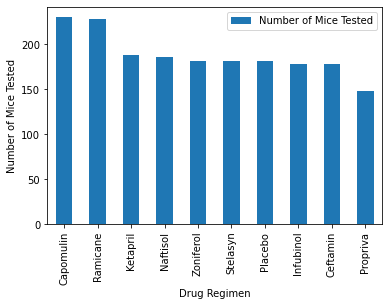

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Filter the DataFrame down only to those columns to chart
drug_and_num_mice = study_data_clean[["Mouse ID","Drug Regimen"]]
drug_and_num_mice = drug_and_num_mice.groupby(["Drug Regimen"]).count()
drug_and_num_mice = drug_and_num_mice.rename(columns={"Mouse ID":"Number of Mice Tested"})
drug_and_num_mice

# Rearrange the rows by the number of mice tested
drug_and_num_mice = drug_and_num_mice.sort_values(by =["Number of Mice Tested", "Drug Regimen"], ascending = [0, 0])

# Use DataFrame.plot() in order to create a bar chart of the data
drug_and_num_mice.plot(kind = "bar")

plt.ylabel("Number of Mice Tested")

plt.show()

Text(0.5, 0, 'Drug Regimen')

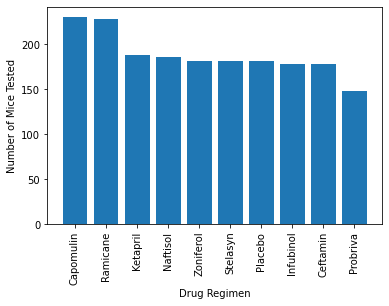

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create an array with the values in "Number of Mice Tested"
num_mice = [value for value in drug_and_num_mice["Number of Mice Tested"]]

# Create tick locations corresponding to the number of values in num_mice
tick_locations = np.arange(len(num_mice))

# Create labels for those tick locations, rotated 90 degrees
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Probriva"], rotation = 90)

# Create a bar graph with those tick locations and their corresponding values
plt.bar(tick_locations, num_mice)

# Label the x- and y-axes
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")

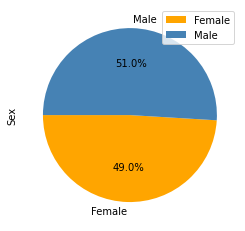

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Filter the DataFrame down only to those columns to plot
male_female_df = study_data_clean[["Mouse ID","Sex"]]
male_female_df = male_female_df.groupby(["Sex"]).count()
male_female_df = male_female_df.rename(columns={"Mouse ID":"Sex"})

# Use DataFrame.plot() in order to create a pie chart of the data
male_female_df.plot(kind = "pie", y = "Sex", autopct = "%1.1f%%",
                   colors = ["orange", "steelblue"], startangle=180)
plt.show()

Text(0, 0.5, 'Sex')

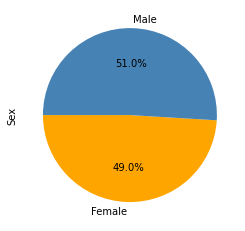

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels for each section of the pie chart
labels = ["Female", "Male"]

# Define the values for each section of the pie chart
sizes = [value for value in male_female_df["Sex"]]

# Select the colors for each section of the pie chart
colors = ["orange", "steelblue"]

# Generate the pie plot with the desired characteristics
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=180)

# Label the y-value
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = pd.DataFrame({"Mouse ID": study_data_clean["Mouse ID"], "Timepoint": study_data_clean["Timepoint"]})
max_timepoint = max_timepoint.groupby(["Mouse ID"]).max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(max_timepoint, study_data_clean, how = "inner", on = ["Mouse ID", "Timepoint"])
max_timepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_regimen_df = max_timepoint_df.loc[(max_timepoint_df["Drug Regimen"] == drug)]
    #print(drug_regimen_df)
    
    # Fill the tumor volume list (for plotting)
    tumor_vol_list = [tumor_vol for tumor_vol in drug_regimen_df["Tumor Volume (mm3)"]]
    
    # Find the lower quartile, upper quartile, and IQR
    tumor_vol_df = pd.DataFrame({"Drug Regimen":drug_regimen_df["Drug Regimen"],"Tumor Volume (mm3)":drug_regimen_df["Tumor Volume (mm3)"]})
    lowerq = tumor_vol_df.quantile(.25)
    upperq = tumor_vol_df.quantile(.75)
    iqr = upperq-lowerq
    
    # Find the upper and lower bound using the quartiles and IQR
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # add subset 
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol_df.loc[(tumor_vol_df["Tumor Volume (mm3)"]> float(upper_bound))|(tumor_vol_df["Tumor Volume (mm3)"]<float(lower_bound))]
    outliers_list = [outlier for outlier in outliers["Tumor Volume (mm3)"]]

    #print(outliers)
    print(f"{drug}'s potential outliers: {outliers_list}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


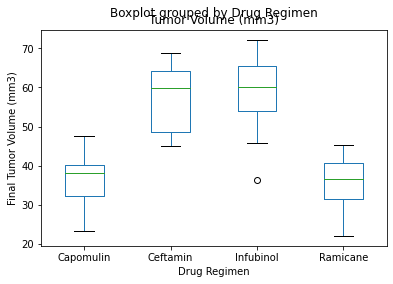

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
max_tp_tumor_vol_df = pd.DataFrame({"Drug Regimen":max_timepoint_df["Drug Regimen"],"Tumor Volume (mm3)":max_timepoint_df["Tumor Volume (mm3)"]})
max_tp_tumor_vol_df = max_tp_tumor_vol_df.loc[(max_tp_tumor_vol_df["Drug Regimen"]=="Capomulin")
                                             | (max_tp_tumor_vol_df["Drug Regimen"]=="Ramicane")
                                             | (max_tp_tumor_vol_df["Drug Regimen"]=="Infubinol")
                                             | (max_tp_tumor_vol_df["Drug Regimen"]=="Ceftamin")]
max_tp_tumor_vol_df.boxplot(by = "Drug Regimen", column="Tumor Volume (mm3)", grid = False)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

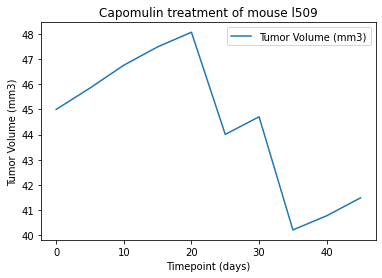

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
study_data_capomulin_l509 = study_data_clean.loc[((study_data_clean["Drug Regimen"]=="Capomulin")&(study_data_clean["Mouse ID"]=="l509"))]
study_data_capomulin_l509 = study_data_capomulin_l509.sort_values(by ="Timepoint")
max_tp_tumor_vol_df = pd.DataFrame({"Timepoint (days)":study_data_capomulin_l509["Timepoint"],"Tumor Volume (mm3)":study_data_capomulin_l509["Tumor Volume (mm3)"]})
max_tp_tumor_vol_df.plot.line(x="Timepoint (days)",y="Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


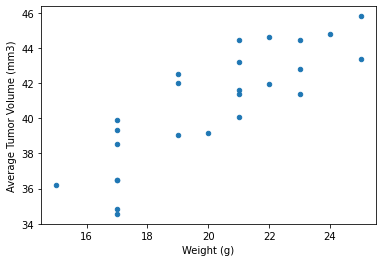

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a data frame that shows just the Capomulin regimen
study_data_capomulin = study_data_clean.loc[(study_data_clean["Drug Regimen"]=="Capomulin")]
# Generate a new data frame with Mouse ID, Tumor Volume, and Weight
avg_tumor_vol_weight_df = pd.DataFrame({"Mouse ID":study_data_capomulin["Mouse ID"], "Average Tumor Volume (mm3)":study_data_capomulin["Tumor Volume (mm3)"],"Weight (g)":study_data_capomulin["Weight (g)"]})
# Group the data in the new data frame by Mouse ID
avg_tumor_vol_weight_df = avg_tumor_vol_weight_df.groupby(["Mouse ID"]).mean()
# Create a scatter plot to show this data
avg_tumor_vol_weight_df.plot(
    x = 'Weight (g)',
    y = 'Average Tumor Volume (mm3)',
    kind = 'scatter'
)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


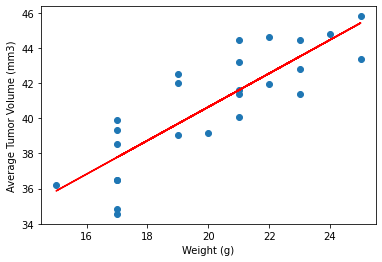

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Create a data frame for capomulin that is grouped by Mouse ID
study_data_capomulin_by_id = study_data_capomulin.groupby(["Mouse ID"]).mean()
study_data_capomulin_by_id

# Determine the correlation coefficient for the variables
weight = study_data_capomulin_by_id.iloc[:,4]
tumor_volume = study_data_capomulin_by_id.iloc[:,1]
correlation = st.pearsonr(weight, tumor_volume)

# Create and label a scatter plot to show the correlation
plt.scatter(weight, tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Create a linear regression line to model the correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values,"r-")

plt.show()